## 项目背景
如果在波涛汹涌，喜怒无常的大海上发生沉船事件，该如何提高自己的生存概率？  
下面以titanic沉船数据为例，简单分析存活率。   

影响乘客存活率因素很多，但本文只是简单分析。将仅分析性别、等级、船票3个因素对存活率的影响。
- 性别是否影响存活率？若有影响，影响有多大？
- 等级是否影响存活率？若有影响，影响有多大？  
- 船票是否影响存活率？若有影响，影响有多大？

下面以性别、等级、船票为自变量，存活率为因变量进行分析

## 数据分析
### 数据载入

下面是数据载入代码。可以查看数据大概信息：
- 总共有891条记录，12个字段
- 有177条记录缺失年龄
- 有687条记录缺失Cabin
- 有2条记录缺失Embarked

In [123]:
# -- coding: utf-8 --
# 1 数据读入
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()  
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = "retina"

titanic_df = pd.read_csv("titanic_data.csv")
# print len(titanic_df)
# titanic_df.head()
# print titanic_df.head()
# print "====="
# print titanic_df.info()
# print "====="
# print titanic_df.describe()
# print "origin.len:",len(titanic_df)


### 数据整理
- 本文关注的3个因变量并无缺失情况
- Embarked，Cabin，Age列有数据缺失，可能会影响计算结果，且本文中并不关注这3列，丢弃该列

In [124]:
# drop NaN
titanic_df.drop(['Age', 'Cabin', 'Embarked'], axis=1, inplace=True)
# 处理原则：尽量将字符型数据转换为可计算的整形数据；去除无法计算的NaN数据（或做数据填充？），避免影响后续计算
# 列Sex做数据转换 male -> 1, female -> 0
# titanic_df.replace(to_replace={"Sex":{"male":1, "female":0}}, inplace=True)
# 数据中，Name, Cabin, Embarked, Ticket,未找到合适的转换方法，暂且直接删除这些列，避免影响后续的计算
# print titanic_df.head()

In [125]:
def plot_var_survived(independent_var):
    colum = independent_var
    plt.figure(figsize = (6,6))
    titanic_df.groupby(colum)[colum].count().plot(kind='pie', autopct='%.0f%%')
    plt.title('Total percent of {}'.format(colum))

    # print titanic_df.groupby('Sex').sum().head(n=2)
    plt.figure(figsize = (6,5))
    survived_rate = (titanic_df.groupby(colum).sum()/titanic_df.groupby(colum).count())['Survived']
    survived_rate.plot(kind='bar')
    plt.title('Survived percent of {}'.format(colum))
    plt.show()

### 性别对存活率影响
- 所有人员中，女性占比35%，男性65%
- 女性存活人员比例约为73%，男性存活人员比例约为19%

结论：
- 女性存活率是男性多3倍还多

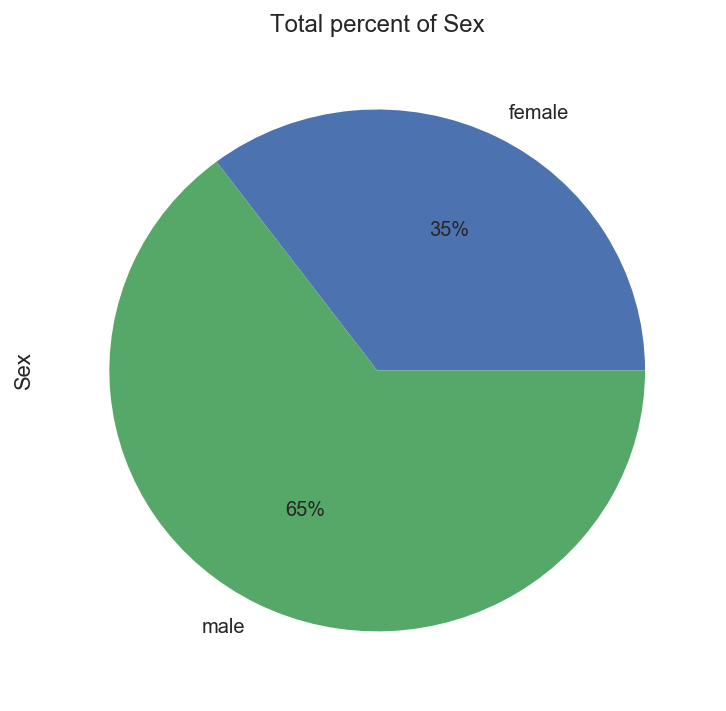

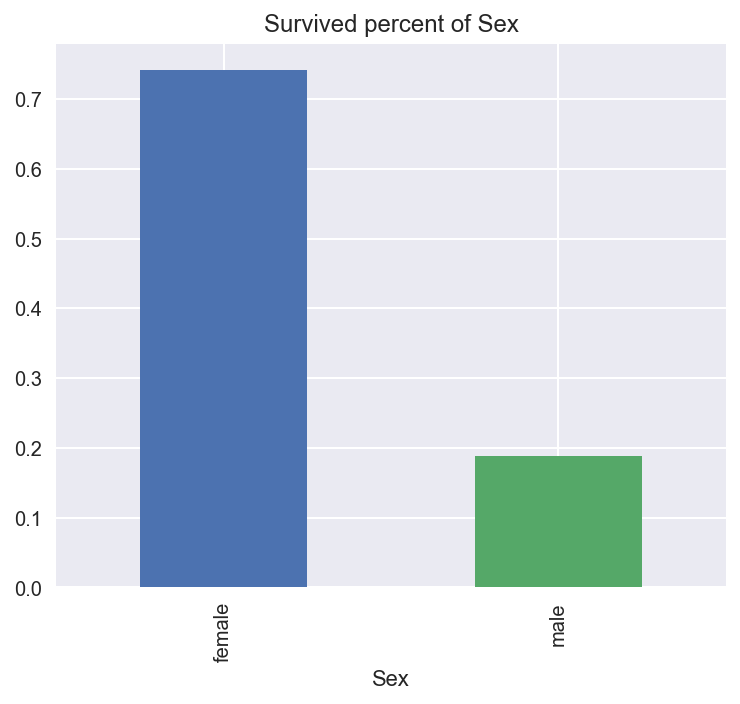

In [126]:
plot_var_survived('Sex')

### 等级对存活率影响
- 所有人员中，等级分布情况：1等级占比24%；2等级占比21%；3等级占比55%
- 存活比例情况：1等级存活比例约为65%；2等级比例约为45%；3等级比例约为25%

结论：
- 等级越高（1最高），存活率越高

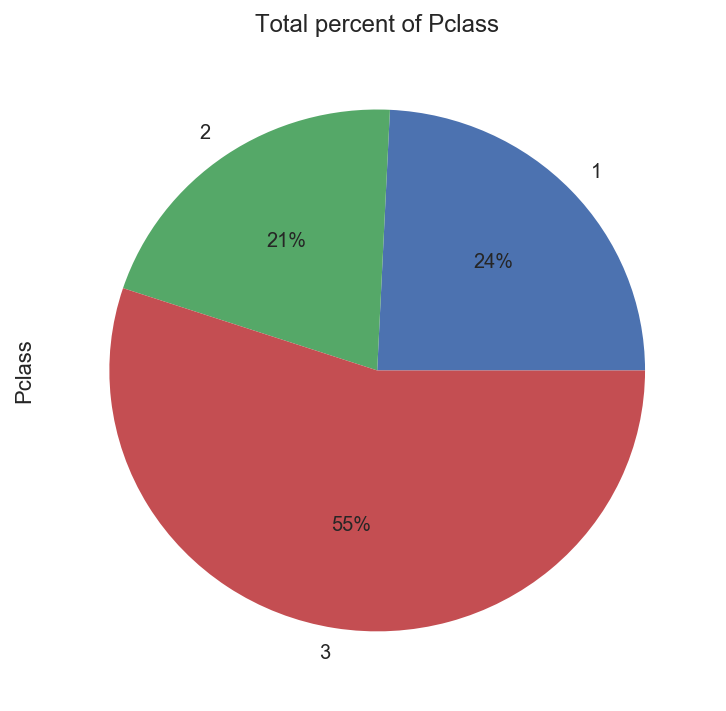

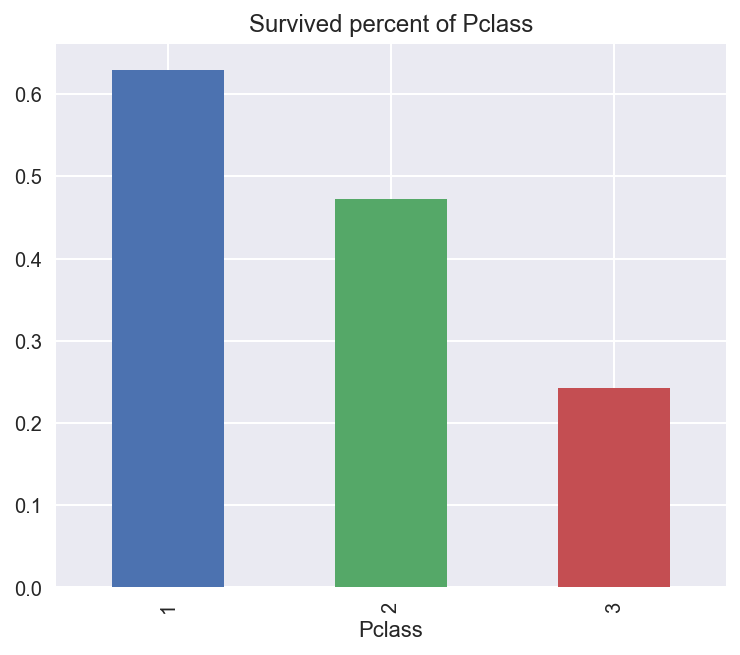

In [127]:
plot_var_survived('Pclass')

### 船票价格对存活率影响

船票价格fare是连续变量，为便于统计，本文其分为3组后再统计
（低价票：(0, 175]，中价票：(175, 350]，高价票(350, 525]）。统计情况如下：
- 所有人员中，购买低价票有856人，中价票17人，高价票3人
- 购买低价票存活率约为38%，中价票存活率约为65%，高价票存活率为100%

结论：
- 票价越高，存活率越高。但由于高价票与中价票样本数量过少，此结论并不可信。

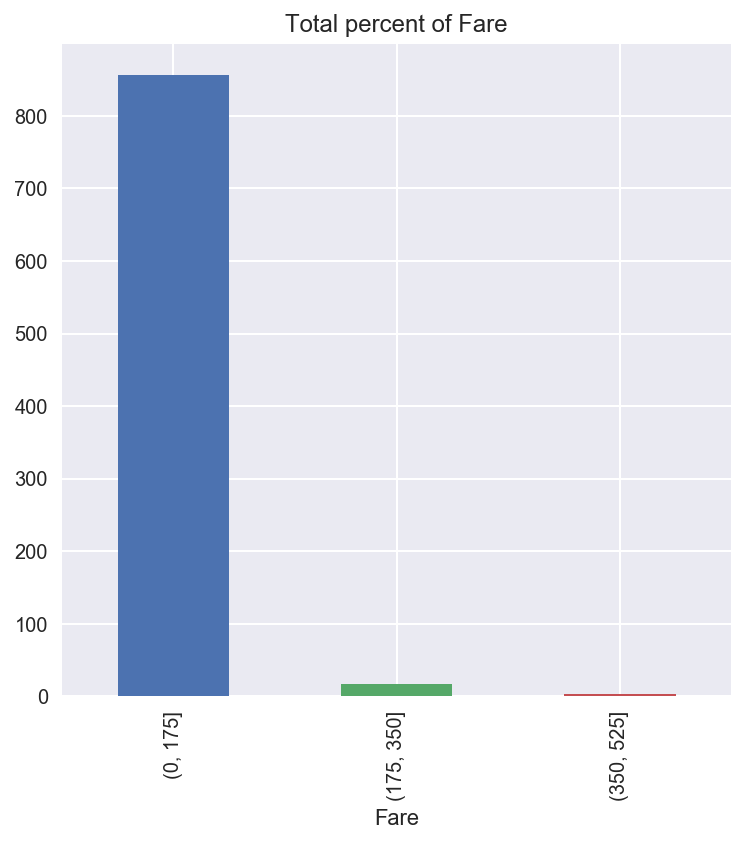

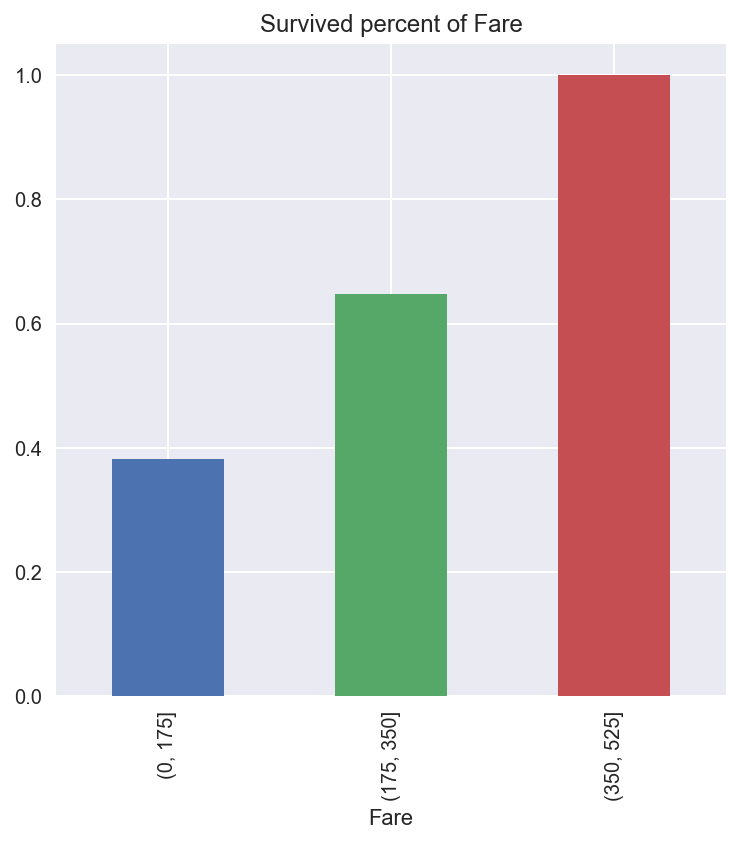

In [128]:
# 船票最高价512.329200
colum = 'Fare'
plt.figure(figsize = (6,6))
fare_bins = np.arange(0, 530, 175)
# print fare_bins
df = titanic_df
fare_cuts = pd.cut(titanic_df[colum], fare_bins)
fare_grup = df.groupby(fare_cuts)
# print fare_grup[colum].count()
fare_grup[colum].count().plot(kind='bar')
plt.title('Total percent of {}'.format(colum))
plt.show()

plt.figure(figsize = (6,6))
fare_cuts = pd.cut(df[colum], fare_bins)
fare_grup = df.groupby(fare_cuts)
# print fare_grup.head(n=1)
survived_rate = (fare_grup.sum()/fare_grup.count())['Survived']
# print survived_rate
survived_rate.plot(kind='bar') 
# fare_grup[colum].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Survived percent of {}'.format(colum))
plt.show()

## 分析结论

经由上述统计，可以获得如下结论：
- 女性存活率是男性多3倍还多
- 等级越高（1最高），存活率越高。
- 票价越高，存活率越高。但由于高价票与中价票样本数量过少，此结论并不可信。

上述结论还在一些限制：
- 由于我们获取的乘客记录只有891条，而总体记录是2224条。因此我们的推论并不准确，会有偏差。如果样本数据是从总体中随机抽取的，则上述结论有一定参考价值。
- 人的存活概率跟许多因素相关，如：海上求生知识，身体素质，心理素质等等。而这些因素，这里没有考虑，也没有这些数据
- 该结论是暂时的，需要进一步改进。